# ASL Letter Classifier: The Brogrammers
Vinay Chitepu<br>
Delaney Gomen<br>
Alexandra Isaly


<br>
<br>

**NOTE:** Make sure to unzip the files in the directory before running.

### Importing Modules and Libraries

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from tensorflow.keras import regularizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D, BatchNormalization

### Global Variables

In [61]:
TRAIN_DATADIR = './Training_Data'
SCORE_DATADIR = './TestingData'

CATEGORIES = ['A','B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y']

### Loading Data

In [71]:
def load_data(data = 'Training', img_size = 100):
    
    if data.upper() == 'TRAINING': d = TRAIN_DATADIR
    elif data.upper() == 'TESTING': d = SCORE_DATADIR
    else: print("Incorrect paramter")
    
    data = []
    labels = []
    for cat in CATEGORIES:
        count = 0
        path = os.path.join(d, cat)
        label = CATEGORIES.index(cat)
        for img in os.listdir(path):
            if count == 1500 : break
            try:
                img_array = cv2.imread(os.path.join(path,img))
                img_array = cv2.resize(img_array, (img_size,img_size))
                data.append(img_array)
                labels.append(label)
                count+=1
            except Exception as e:
                pass

    # Normalizing data
    data = np.array(data)
    data = data.astype('float32')/255
    
    # One-Hot Encoding for Labels
    labels = np.array(labels)
    labels = to_categorical(labels)
    
    
    return data, labels

In [73]:
X_train, y_train = load_data(data='Training', img_size=64)
X_test, y_test = load_data(data='Testing', img_size=64)

### Checking Data

In [74]:
# 100x100 image but has like
X_train.shape

(2144, 64, 64, 3)

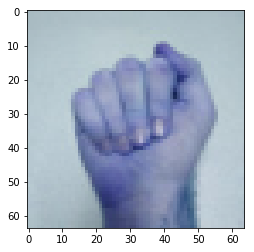

In [75]:
plt.imshow(X_train[45])

### Building CNN in Tensorflow

In [76]:
# Initializing model
model = Sequential()

# Layer 1
model.add(Conv2D(16, kernel_size = [3,3], activation = 'relu', padding = 'same', input_shape = (64,64,3)))
model.add(Conv2D(32, kernel_size = [3,3], padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size=[3,3]))

# Layer 2
model.add(Conv2D(32, kernel_size = [3,3], padding = 'same', activation = 'relu'))
model.add(Conv2D(64, kernel_size = [3,3], padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size=[3,3]))

# Layer 3
model.add(Conv2D(128, kernel_size = [3,3], padding = 'same', activation = 'relu'))
model.add(Conv2D(256, kernel_size = [3,3], padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size=[3,3]))

model.add(BatchNormalization())

# Layer 4
model.add(Flatten())  # Converts 2-D to 1-D
model.add(Dropout(0.5))
model.add(Dense(512, activation = 'relu', kernel_regularizer=regularizers.l2(0.001)))

# Output Layer
model.add(Dense(24, activation = 'softmax'))

# Compiling Model
model.compile(loss = categorical_crossentropy,   # There are only 2 classes
             optimizer = 'adam',              # Optimization Function
             metrics = ['accuracy'])          # Using accuracy

In [77]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 64, 64, 16)        448       
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 21, 21, 32)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 21, 21, 32)        9248      
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 7, 7, 128)         73856     
__________

### Training Model

In [78]:
model.fit(X_train, y_train, batch_size=8, epochs=6, validation_split=0.1)

Train on 1929 samples, validate on 215 samples
Epoch 1/6
1929/1929 [==============================] - 18s 9ms/step - loss: 2.7951 - acc: 0.2934 - val_loss: 4.6077 - val_acc: 0.0000e+00
Epoch 2/6
1929/1929 [==============================] - 17s 9ms/step - loss: 1.5742 - acc: 0.6039 - val_loss: 6.2339 - val_acc: 0.0000e+00
Epoch 3/6
1929/1929 [==============================] - 19s 10ms/step - loss: 1.1807 - acc: 0.7076 - val_loss: 11.8320 - val_acc: 0.0000e+00
Epoch 4/6
1929/1929 [==============================] - 19s 10ms/step - loss: 0.9526 - acc: 0.7833 - val_loss: 11.9833 - val_acc: 0.0791
Epoch 5/6
1929/1929 [==============================] - 18s 9ms/step - loss: 0.8383 - acc: 0.8263 - val_loss: 12.6357 - val_acc: 0.0884
Epoch 6/6
1929/1929 [==============================] - 16s 8ms/step - loss: 0.7791 - acc: 0.8357 - val_loss: 11.6400 - val_acc: 0.0605


### Exporting Model

In [85]:
model.save('hard_model.h5')
# model.save('hard_model_backup.h5')

### Importing Model

In [86]:
model = load_model('hard_model.h5')

### Testing Model

In [87]:
model.evaluate(X_test, y_test)

717/717 [==============================] - 2s 3ms/step


[1.7330961573240315, 0.7573221757322176]

### Looking at Predictions

In [80]:
X_test, y_test = load_data(data='Testing', img_size=64)

In [81]:
preds = model.predict_classes(X_test)

In [82]:
preds = preds.reshape(-1)

In [84]:
preds

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 16,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, 11, 13,  0, 15,  0, 13, 15,  0,
       15, 13,  0, 15, 13,  0, 13, 15, 13, 15, 13, 13, 15, 13, 13,  0, 13,
       15, 13,  0, 15, 13, 16,  3,  3,  3,  3, 16,  3, 16, 16,  3,  3,  3,
        3,  3,  3, 16,  3,  3,  3,  3,  3,  3, 16,  3,  3,  3,  3,  3,  3,
       16,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4, 11, 15,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  6,  7,  6,  6,  6,  7,  6,  6,  6,
        7,  6,  6,  6,  7,  6,  6,  6,  6,  7,  6,  6,  6,  6,  6,  6,  6,
        7,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  6,  7,  7,  7